In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from analyzer.logic import load_contacts, row_to_prospect, plot_booking_rate, total_touches_analysis
from analyzer.search import ProspectSearcher

In [2]:
emails_per_person = 4.419
sequences_seen = 1.202

In [3]:
df = load_contacts("cleaned-data-main-seq-25.csv")
df.head()

,Record ID,First,Last,Name,Currently In Sequence,Job Title,Company,State,Number of Sequences Enrolled,Number of Sales Activities,Create Date,Last Sequence Enrolled,Last Sequence Ended Date,Last Contacted,Last Engagement Date,Meeting Booked
0,2.816631e+10,Michael,Reese,Michael Reese,False,"Head Senior VP, Corporate Real Estate & Facili...",Customers Bank,Pennsylvania,3,37,6/7/2024 14:09,269668391,3/7/2025 14:23,4/2/2025 11:15,4/16/2025 16:35,1
1,4.373301e+06,Kris,Weir,Kris Weir,False,"Space Planning Director, Operations",Questrom School of Business,Massachusetts,8,37,3/7/2022 9:28,279559810,7/9/2025 12:33,10/20/2025 15:00,10/16/2025 12:57,1
2,3.323551e+06,Scott,Albert,Scott Albert,False,Vice President of Facilities,Slippery Rock University,Pennsylvania,14,67,10/18/2021 9:14,279109668,7/30/2025 14:25,10/15/2025 10:20,10/15/2025 12:04,1
3,1.446120e+11,Amy,Ciba,Amy Ciba,False,"Senior Director, Global Workplaces",Meltwater,Stockholms län,1,9,8/6/2025 15:11,269580465,8/6/2025 16:46,9/4/2025 12:54,8/17/2025 14:52,1
4,3.000951e+06,Jessica,Davenport,Jessica Davenport,False,Director Campus Planning & Design,Salt Lake Community College,Utah,8,74,7/19/2021 17:23,279559810,7/9/2025 10:06,9/17/2025 15:39,7/15/2025 10:35,1


In [6]:
df["role_category"] = df.apply(lambda row: row_to_prospect(row).get_role_category(), axis=1)
df["func_group"] = df.apply(lambda row: row_to_prospect(row).get_functional_group(), axis=1)
summary = df.groupby(['role_category', "func_group"])["Meeting Booked"].agg(["count", 'sum'])
summary["booking_rate"] = (summary["sum"] / summary['count']) * 100
sorted_summary = summary.sort_values("booking_rate", ascending=False).round(2)

<Axes: >

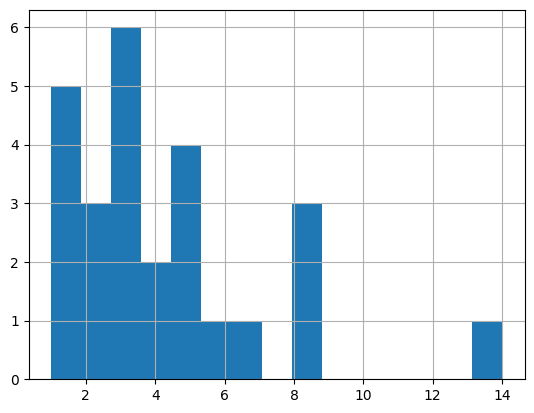

In [7]:
df[df["Meeting Booked"] != 0]["Number of Sequences Enrolled"].hist(bins=15)

<Axes: >

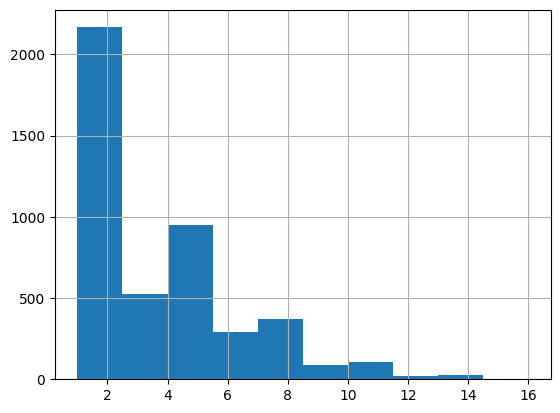

In [8]:
df["Number of Sequences Enrolled"].hist()

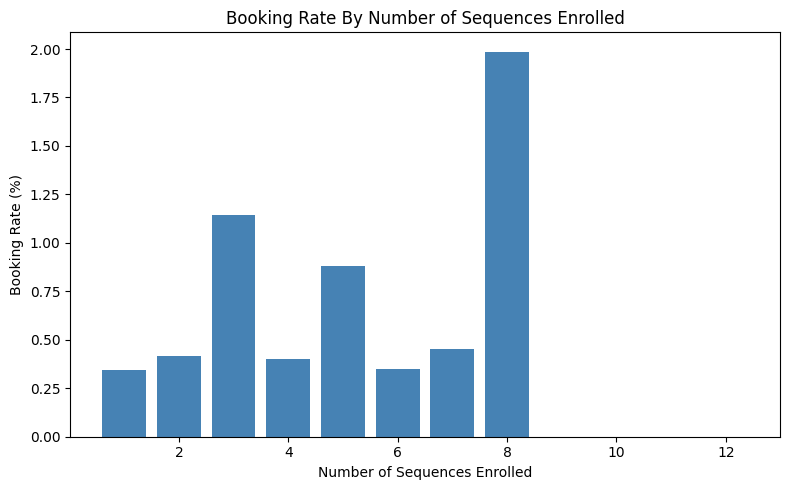

In [9]:
def analyze_by_field(field, cutoff=None):
    amt_of_sequences = (
        df.groupby(f"{field}")["Meeting Booked"]
            .agg(["count", "sum"])
            .reset_index()
        )
    
    amt_of_sequences["Rate"] = amt_of_sequences['sum'] / amt_of_sequences['count'] * 100
    amt_of_sequences = amt_of_sequences.sort_values(f"{field}")

    if cutoff != None:
        filtered = amt_of_sequences[amt_of_sequences[f"{field}"] <= cutoff]
    else:
        filtered = amt_of_sequences
    
    fig, ax = plt.subplots(figsize=(8,5))
    ax.bar(filtered[f"{field}"], filtered["Rate"], color="steelblue")
    
    ax.set_title(f"Booking Rate By {field}")
    ax.set_xlabel(f"{field}")
    ax.set_ylabel("Booking Rate (%)")
    
    plt.tight_layout()
    plt.show()
analyze_by_field("Number of Sequences Enrolled", 12)

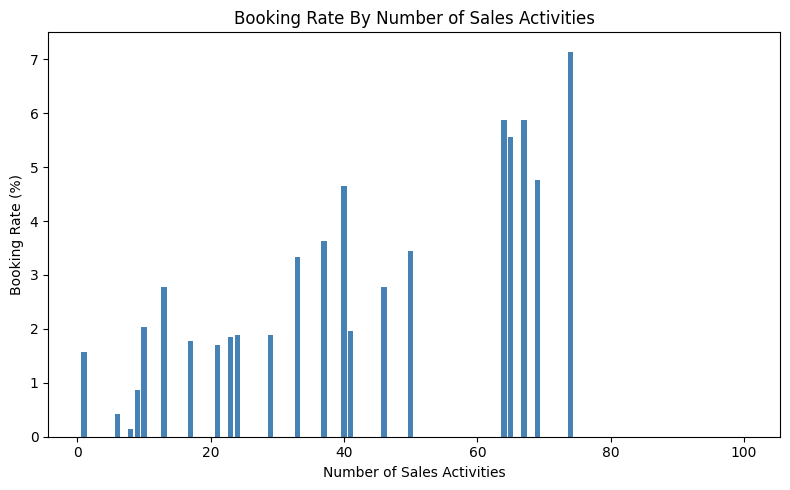

In [10]:
analyze_by_field("Number of Sales Activities", 100)

In [11]:
states = df.groupby("State")["Meeting Booked"].agg(["count", 'sum']).reset_index()
states["Rate"] = states['sum'] / states['count'] * 100
states_sorted = states.sort_values("Rate", ascending=False)
states_sorted[states_sorted["Rate"] > 0]

,State,count,sum,Rate
100,Stockholms län,1,1,100.000000
50,MA,5,1,20.000000
54,Maine,8,1,12.500000
108,Utah,22,1,4.545455
32,District of Columbia,24,1,4.166667
25,Colorado,59,2,3.389831
87,Oregon,33,1,3.030303
42,Indiana,48,1,2.083333
121,Wisconsin,52,1,1.923077
113,Virginia,105,2,1.904762


In [12]:
states.sort_values("count", ascending=False).head(20)

,State,count,sum,Rate
21,California,598,1,0.167224
74,New York,400,1,0.250000
106,Texas,297,1,0.336700
56,Massachusetts,246,3,1.219512
89,Pennsylvania,173,3,1.734104
34,Florida,165,2,1.212121
77,North Carolina,156,0,0.000000
41,Illinois,135,0,0.000000
36,Georgia,135,1,0.740741
71,New Jersey,117,0,0.000000
